In [37]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

data = pd.read_csv("data_RNA_Seq_v2_expression_median.txt",sep="\t",index_col=1)
meta_patients = pd.read_csv("data_bcr_clinical_data_patient.txt",sep="\t",header=4,index_col=1)
meta_sample = pd.read_csv("data_bcr_clinical_data_sample.txt",sep="\t",header=4)

cols = meta_sample.columns.tolist()
cols[1], cols[0] = cols[0], cols[1]

meta_sample = meta_sample.loc[:,cols]
meta_sample.set_index("SAMPLE_ID",inplace=True)

print(data.shape)
print(meta_patients.shape)
print(meta_sample.shape)


(20531, 518)
(522, 79)
(586, 24)


In [22]:
print(data.isnull().sum().sum())
print(meta_patients.isnull().sum().sum())


2
0


In [23]:
sel_index=data.apply(lambda x: (x==0).all(), axis = 0)
sel_index.index[sel_index]

Index([], dtype='object')

In [34]:
data_scaled = preprocessing.scale(data.iloc[:,1:])

#data_scaled = np.column_stack((data.iloc[:,0],data_scaled))
data_scaled = pd.DataFrame(data_scaled, index =data.index , columns = data.columns[1:])
print(data_scaled.shape)
data_scaled.describe()



(20531, 517)


,TCGA-05-4244-01,TCGA-05-4249-01,TCGA-05-4250-01,TCGA-05-4382-01,TCGA-05-4384-01,TCGA-05-4389-01,TCGA-05-4390-01,TCGA-05-4395-01,TCGA-05-4396-01,TCGA-05-4397-01,...,TCGA-NJ-A4YG-01,TCGA-NJ-A4YI-01,TCGA-NJ-A4YP-01,TCGA-NJ-A4YQ-01,TCGA-NJ-A55A-01,TCGA-NJ-A55O-01,TCGA-NJ-A55R-01,TCGA-NJ-A7XG-01,TCGA-O1-A52J-01,TCGA-S2-AA1A-01
count,2.053100e+04,2.053100e+04,2.053100e+04,2.053100e+04,2.053100e+04,2.053100e+04,2.053100e+04,2.053100e+04,2.053100e+04,2.053100e+04,...,2.053100e+04,2.053100e+04,2.053100e+04,2.053100e+04,2.053100e+04,2.053100e+04,2.053100e+04,2.053100e+04,2.053100e+04,2.053100e+04
mean,-3.115773e-16,-1.279371e-16,-1.180710e-16,1.760426e-16,1.639365e-16,-5.013876e-17,-1.044819e-16,-5.187187e-18,2.994468e-16,-9.816857e-17,...,-5.840000e-16,-1.414641e-16,3.188910e-16,-1.227702e-16,-4.443650e-17,4.291036e-16,-8.778067e-17,2.858563e-17,-1.056851e-16,1.914812e-17
std,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,...,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00
min,-2.379758e-01,-2.842081e-01,-2.626203e-01,-2.374016e-01,-2.168511e-01,-2.403818e-01,-2.170053e-01,-2.190499e-01,-1.699081e-01,-3.270922e-01,...,-1.642516e-01,-2.230331e-01,-2.491517e-01,-1.646211e-01,-3.036185e-01,-1.810726e-01,-2.682129e-01,-1.131176e-01,-1.543711e-01,-1.410340e-01
25%,-2.362731e-01,-2.821306e-01,-2.611826e-01,-2.352066e-01,-2.151068e-01,-2.388122e-01,-2.161395e-01,-2.184867e-01,-1.689584e-01,-3.247188e-01,...,-1.632408e-01,-2.215395e-01,-2.475431e-01,-1.631929e-01,-2.990303e-01,-1.798631e-01,-2.636506e-01,-1.126076e-01,-1.533358e-01,-1.395579e-01
50%,-1.869794e-01,-2.222808e-01,-2.078085e-01,-1.808513e-01,-1.668470e-01,-1.877570e-01,-1.747213e-01,-1.897625e-01,-1.376212e-01,-2.500801e-01,...,-1.320914e-01,-1.759019e-01,-1.948448e-01,-1.271216e-01,-2.086346e-01,-1.419273e-01,-1.970830e-01,-9.333137e-02,-1.241266e-01,-1.070846e-01
75%,-3.194700e-02,-2.393561e-02,-3.748754e-02,-2.688335e-02,-1.683461e-02,-2.903397e-02,-3.358210e-02,-6.470214e-02,-2.610938e-02,-3.993109e-03,...,-3.097049e-02,-2.123178e-02,-3.330729e-02,-1.620096e-02,1.097588e-02,-2.443665e-02,-1.227663e-02,-2.203986e-02,-2.549846e-02,-2.101192e-02
max,6.888929e+01,4.859775e+01,4.731961e+01,5.039623e+01,9.873500e+01,8.431307e+01,6.340503e+01,7.342163e+01,8.200304e+01,3.874696e+01,...,8.471857e+01,9.757246e+01,5.011805e+01,1.165459e+02,5.436600e+01,8.561694e+01,6.685034e+01,1.094149e+02,1.104419e+02,1.093210e+02


In [25]:
data_scaled.isnull().sum().sum()

0

In [26]:
#the followig code verifies whether there is repeated patients identifier or not
patients_list = data_scaled.columns.tolist()
res = []
seen = []
for patient in patients_list:
    if patient in seen:
        res.append(patient)
    else:
        seen.append(patient)
print(res)




[]


In [43]:
subset_meta_sample = pd.DataFrame(meta_sample.loc[data_scaled.columns])
subset_meta_patients = pd.DataFrame(meta_patients.loc[subset_meta_sample.loc[:,"PATIENT_ID"]]) 
print(subset_meta_sample.shape)
print(subset_meta_patients.shape)

(517, 24)
(517, 79)


In [44]:
sel_index=subset_meta_patients.apply(lambda x: (x=="[Not Available]").all(), axis = 0)
labels_with_data = sel_index[sel_index==False].index.tolist()

subset_meta_patients = subset_meta_patients.loc[:,labels_with_data]
print(subset_meta_patients.shape)
print(data_scaled.shape)

lis = subset_meta_patients.index.tolist()
lis2 = data_scaled.columns.tolist()
for i in range(len(lis)):
    if lis[i]=="TCGA-50-5066":
        print("patient : " + str(i))
    if lis2[i]=="TCGA-50-5066-01" or lis2[i]=="TCGA-50-5066-02":
        print("data TCGA-50-5066-01 or TCGA-50-5066-02: " + str(i))
    
    if lis[i]=="TCGA-50-5946":
        print("patient TCGA-50-5946: " + str(i))
    if lis2[i]=="TCGA-50-5946-01" or lis2[i]=="TCGA-50-5946-02":
        print("data TCGA-50-5946-01 or TCGA-50-5946-02: " + str(i))

        


(517, 65)
(20531, 517)
patient : 129
data TCGA-50-5066-01 or TCGA-50-5066-02: 129
patient : 130
data TCGA-50-5066-01 or TCGA-50-5066-02: 130
patient TCGA-50-5946: 143
data TCGA-50-5946-01 or TCGA-50-5946-02: 143
patient TCGA-50-5946: 144
data TCGA-50-5946-01 or TCGA-50-5946-02: 144


In [48]:
sample_ids = data_scaled.columns.tolist()
patient_ids = subset_meta_patients.index.tolist()
subset_meta_patients.insert(0,"SAMPLE_ID", sample_ids)
subset_meta_patients.set_index("SAMPLE_ID",inplace=True)
subset_meta_patients.insert(0,"PATIENT_ID",patient_ids)
subset_meta_patients

ValueError: cannot insert PATIENT_ID, already exists

In [12]:
quantity_na = subset_meta_patients.apply(lambda x: (x=="[Not Available]").sum(), axis = 0)
print(str(quantity_na[quantity_na!=0].index.size) + " labels with more than one [Not available] information")
print(str(quantity_na[quantity_na!=0].sum()) + " [Not available] information")


45 labels with more than one [Not available] information
9676 [Not available] information


In [13]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

print(subset_meta_patients.columns.tolist())

print(subset_meta_patients.groupby('VITAL_STATUS').size())


# ind=subset_meta_patients.groupby('VITAL_STATUS').size().index
# values = subset_meta_patients.groupby('VITAL_STATUS').size().tolist()
# plt.bar(ind, values,color=('c','k'))
# plt.xticks(ind)
# plt.show()


# data_control = data_scale[meta["Muscle.loss"]=="control"]
# data_control.iloc[:,[13,17,19]].plot.bar()

['OTHER_PATIENT_ID', 'FORM_COMPLETION_DATE', 'HISTOLOGICAL_DIAGNOSIS', 'PROSPECTIVE_COLLECTION', 'RETROSPECTIVE_COLLECTION', 'SEX', 'TUMOR_SITE', 'RACE', 'ETHNICITY', 'HISTORY_OTHER_MALIGNANCY', 'PRIMARY_SITE_PATIENT', 'LOCATION_LUNG_PARENCHYMA', 'INITIAL_PATHOLOGIC_DX_YEAR', 'RESIDUAL_TUMOR', 'AJCC_STAGING_EDITION', 'AJCC_TUMOR_PATHOLOGIC_PT', 'AJCC_NODES_PATHOLOGIC_PN', 'AJCC_METASTASIS_PATHOLOGIC_PM', 'AJCC_PATHOLOGIC_TUMOR_STAGE', 'AJCC_NODES_CLINICAL_CT', 'AJCC_NODES_CLINICAL_CN', 'AJCC_METASTASIS_CLINICAL_CM', 'AJCC_CLINICAL_TUMOR_STAGE', 'PULMONARY_FUNCTION_TEST_INDICATOR', 'FEV1_PERCENT_REF_PREBRONCHOLIATOR', 'FEV1_PERCENT_REF_POSTBRONCHOLIATOR', 'FEV1_FVC_RATIO_PREBRONCHOLIATOR', 'FEV1_FVC_RATIO_POSTBRONCHOLIATOR', 'CARBON_MONOXIDE_DIFFUSION_DLCO', 'KRAS_GENE_ANALYSIS_INDICATOR', 'KRAS_MUTATION', 'KRAS_MUTATION_IDENTIFIED_TYPE', 'MUTATION_STATUS', 'MUTATION_TYPE', 'ALK_TRANSLOCATION_STATUS', 'ALK_ANALYSIS_TYPE', 'TOBACCO_SMOKING_HISTORY_INDICATOR', 'HISTORY_NEOADJUVANT_TRTYN',

In [79]:
print(subset_meta_patients.groupby('TUMOR_STATUS').size())

TUMOR_STATUS
TUMOR FREE         308
WITH TUMOR         111
[Discrepancy]        4
[Not Available]     94
dtype: int64


In [72]:
data_scaled = data_scaled.transpose()

0


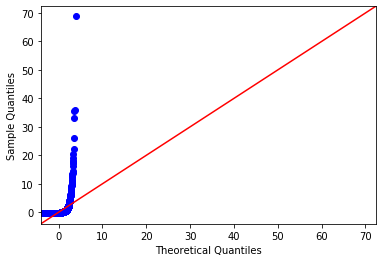

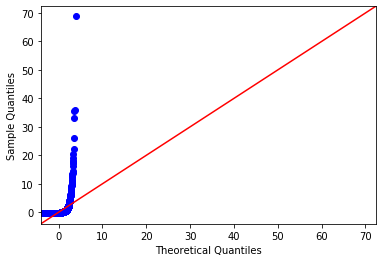

In [73]:
from scipy import stats
p_values=[]
for sample in data_scaled.index.tolist():
    w, p_value = stats.shapiro(np.random.choice(data_scaled.loc[sample],500))
    p_values.append(p_value)

counter = 0
for p_value in p_values:
    if p_value>=0.05:
        counter+=1

print(counter)

test = data_scaled.iloc[0]
sm.qqplot(test,line='45')



In [74]:
data_scaled


Entrez_Gene_Id,100130426,100133144,100134869,10357,10431,136542,155060,26823,280660,317712,...,7789,158586,79364,440590,79699,7791,23140,26009,387590,389932
TCGA-05-4244-01,-0.237976,-0.235534,-0.235224,-0.225879,-0.030925,-0.237976,-0.153776,-0.237720,-0.237976,-0.237976,...,-0.228270,-0.166632,-0.004022,-0.237806,0.027393,0.454179,-0.025477,-0.097672,-0.236358,-0.237976
TCGA-05-4249-01,-0.284208,-0.281997,-0.280385,-0.256397,-0.000292,-0.284208,-0.239593,-0.283713,-0.284208,-0.284208,...,-0.265116,-0.132556,0.078155,-0.277976,-0.042237,0.438243,0.065493,-0.072112,-0.228909,-0.284208
TCGA-05-4250-01,-0.262620,-0.260657,-0.260989,-0.249197,0.046482,-0.262620,-0.248603,-0.262620,-0.262620,-0.262620,...,-0.246357,-0.163600,-0.033938,-0.255432,-0.133857,1.210829,0.054569,-0.118223,-0.260913,-0.262620
TCGA-05-4382-01,-0.237402,-0.234666,-0.235573,-0.217408,-0.042566,-0.237402,-0.179465,-0.237286,-0.237344,-0.237402,...,-0.227640,-0.153703,-0.008890,-0.221748,-0.018190,1.396779,0.044830,-0.077166,-0.228910,-0.237402
TCGA-05-4384-01,-0.216851,-0.216084,-0.216020,-0.199591,-0.083119,-0.216851,-0.151584,-0.216706,-0.216851,-0.216851,...,-0.197809,-0.082828,0.097419,-0.214961,-0.031516,0.578273,0.196555,-0.044744,-0.126873,-0.216851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-NJ-A55O-01,-0.181073,-0.178148,-0.176740,-0.162191,-0.016355,-0.181073,-0.132801,-0.180853,-0.181073,-0.181073,...,-0.173376,-0.119056,0.027629,-0.177774,-0.044174,0.607770,0.070293,-0.070784,-0.080021,-0.181073
TCGA-NJ-A55R-01,-0.268213,-0.265791,-0.265243,-0.246717,-0.047634,-0.268213,-0.161691,-0.268006,-0.268213,-0.268213,...,-0.253627,-0.160516,0.159119,-0.253074,-0.050192,0.617213,0.304075,-0.092220,-0.050330,-0.267867
TCGA-NJ-A7XG-01,-0.113118,-0.108331,-0.104085,-0.103611,-0.037644,-0.113118,-0.075840,-0.113118,-0.113118,-0.113118,...,-0.111231,-0.094300,0.023295,-0.111996,-0.053912,0.109069,0.045478,-0.065590,-0.112506,-0.113118
TCGA-O1-A52J-01,-0.154371,-0.152194,-0.150632,-0.144922,0.021401,-0.154371,-0.127972,-0.153927,-0.154371,-0.154371,...,-0.133296,-0.067409,0.046026,-0.154297,-0.033467,0.538514,0.080633,-0.080498,-0.125606,-0.154297


In [80]:

patients = data_scaled.index.tolist()
mydata = data_scaled.copy()
mydata.insert(len(mydata.columns),"VITAL_STATUS",subset_meta_patients.loc[:,"VITAL_STATUS"])
interest_vital_status = []
for ids in mydata.columns.tolist()[:-1]:
    l_data = {grp: mydata[ids][mydata.loc[:,"VITAL_STATUS"] == grp] for grp in ['Dead', 'Alive']}
    f, p = stats.f_oneway(l_data['Dead'],l_data['Alive'])
    if p<0.05:
        interest_vital_status.append(ids)



In [78]:
import statsmodels.stats.multicomp as multi
x = pd.Series(mydata[interest_vital_status[1]].values, dtype=float) 
y = mydata["VITAL_STATUS"]
mcDate = multi.MultiComparison(x,y)
Results = mcDate.tukeyhsd()
print(Results)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
 Alive   Dead  -0.0113 0.0228 -0.0209 -0.0016   True
----------------------------------------------------


In [96]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm


interest_vital_status2=[]
for ids in mydata.columns.tolist()[:-1]:
    lm = ols("mydata["+str(ids)+"]~mydata['VITAL_STATUS']",mydata).fit()
    p = anova_lm(lm).loc["mydata['VITAL_STATUS']","PR(>F)"]
    if p<0.05:
        interest_vital_status2.append(ids)
 


In [97]:
interest_vital_status2

[100130426,
 100133144,
 100134869,
 136542,
 155060,
 26823,
 280660,
 317712,
 340602,
 388795,
 390284,
 391343,
 391714,
 404770,
 441362,
 442388,
 553137,
 645851,
 652919,
 728045,
 728603,
 728788,
 729884,
 90288,
 1,
 29974,
 54715,
 2,
 51146,
 404744,
 344752,
 126767,
 343066,
 13,
 51166,
 22848,
 14,
 15,
 57505,
 132949,
 10157,
 9625,
 18,
 10349,
 79963,
 154664,
 650655,
 19,
 20,
 21,
 23461,
 23460,
 10351,
 10350,
 8647,
 5243,
 5244,
 340273,
 10058,
 22,
 23457,
 89845,
 85320,
 94160,
 150000,
 4363,
 1244,
 10257,
 653190,
 730013,
 368,
 6833,
 215,
 225,
 6059,
 64137,
 64240,
 64241,
 145447,
 84696,
 63874,
 57406,
 25890,
 51225,
 84448,
 137735,
 80325,
 32,
 84129,
 33,
 36,
 9744,
 116983,
 79777,
 91452,
 414149,
 41,
 9311,
 55515,
 51802,
 390110,
 84680,
 125981,
 340485,
 1636,
 50,
 134526,
 55856,
 641372,
 10005,
 8309,
 55289,
 52,
 55,
 93650,
 84519,
 93953,
 56,
 49,
 23205,
 81616,
 2181,
 23305,
 116285,
 123876,
 348158,
 341392,
 54988,